In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("./data/tmp.csv",encoding = 'utf-8')

In [3]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print(missing_columns)

HomePlanet             288
CryoSleep              310
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped     299
Cabin_num              299
dtype: int64


#### test_df가 융합되어있는 상태이므로 transported null 값은 무시

#### HomePlanet과 LastName과의 관계

In [4]:
df['LastName'] = df['Name'].apply(lambda x: x.split()[-1] if pd.notnull(x) else '')

In [5]:
LHP_gb = df.groupby(['LastName', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

In [6]:
LHP_gb

HomePlanet,Earth,Europa,Mars
LastName,,,
,159.0,65.0,60.0
Acobson,5.0,0.0,0.0
Acobsond,8.0,0.0,0.0
Adavisons,10.0,0.0,0.0
Adkinson,4.0,0.0,0.0
...,...,...,...
Wynneyerson,2.0,0.0,0.0
Yanton,7.0,0.0,0.0
Yatters,8.0,0.0,0.0


In [7]:
unique_planets_per_lastname = (LHP_gb > 0).sum(axis=1)

In [8]:
unique_planets_per_lastname

LastName
               3
Acobson        1
Acobsond       1
Adavisons      1
Adkinson       1
              ..
Wynneyerson    1
Yanton         1
Yatters        1
Yorkland       1
Youngrayes     1
Length: 2401, dtype: int64

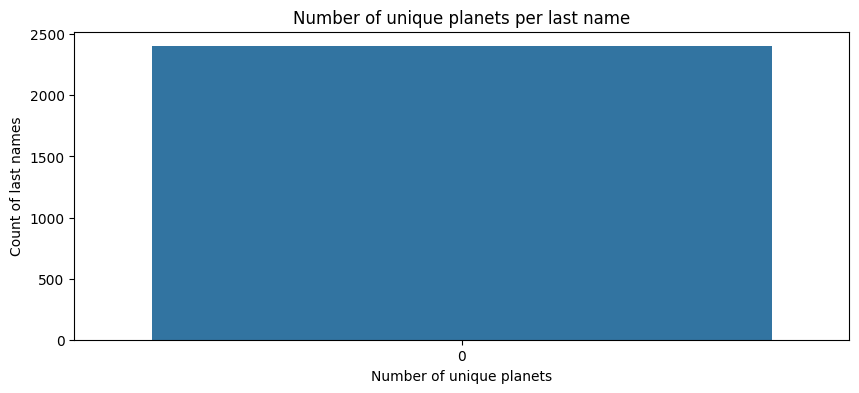

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(unique_planets_per_lastname)
plt.title('Number of unique planets per last name')
plt.xlabel('Number of unique planets')
plt.ylabel('Count of last names')
plt.show()


In [10]:
df['HomePlanet'] = df['HomePlanet'].fillna(df.groupby('LastName')['HomePlanet'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [11]:
df.isnull().sum()

PassengerId              0
HomePlanet               7
CryoSleep              310
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped     299
Cabin_num              299
LastName                 0
dtype: int64

#### 전체적으로 연관성을 더 쉽게 보기 위해 Heatmap을 그림

In [12]:
df["spend_money"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

In [13]:
en_df = df

In [14]:
Destination_dummies = pd.get_dummies(en_df["Destination"],prefix="D",dtype = int)

In [15]:
en_df = pd.concat([en_df,Destination_dummies],axis=1)

#### 먼저 hotencoding을 하자(HomePlanet)

In [16]:
HomePlanet_dummies = pd.get_dummies(en_df["HomePlanet"],prefix="HP",dtype=int)

In [17]:
en_df = pd.concat([en_df,HomePlanet_dummies],axis =1)

In [18]:
en_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_deck_grouped,Cabin_num,LastName,spend_money,D_55 Cancri e,D_PSO J318.5-22,D_TRAPPIST-1e,HP_Earth,HP_Europa,HP_Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Other,0.0,Ofracculy,0.0,0,0,1,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,F,0.0,Vines,736.0,0,0,1,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Other,0.0,Susent,10383.0,0,0,1,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Other,0.0,Susent,5176.0,0,0,1,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,F,1.0,Santantines,1091.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,G,1496.0,Peter,0.0,0,0,1,1,0,0
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,NaN,NaN,Scheron,1018.0,0,0,1,1,0,0
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,Other,296.0,Pore,0.0,1,0,0,0,0,1
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,Other,297.0,Conale,3203.0,0,0,0,0,1,0


In [19]:
Cabin_deck_grouped_dummies = pd.get_dummies(en_df["Cabin_deck_grouped"],prefix="Cdg",dtype=int)

In [20]:
en_df = pd.concat([en_df,Cabin_deck_grouped_dummies],axis =1)

In [21]:
en_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,spend_money,D_55 Cancri e,D_PSO J318.5-22,D_TRAPPIST-1e,HP_Earth,HP_Europa,HP_Mars,Cdg_F,Cdg_G,Cdg_Other
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,0,0,1,0,1,0,0,0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,736.0,0,0,1,1,0,0,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,10383.0,0,0,1,0,1,0,0,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,5176.0,0,0,1,0,1,0,0,0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1091.0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,0.0,0,0,1,1,0,0,0,1,0
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,1018.0,0,0,1,1,0,0,0,0,0
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,0.0,1,0,0,0,0,1,0,0,1
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,3203.0,0,0,0,0,1,0,0,0,1


In [22]:
import sklearn
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [23]:
label_encoder.fit(en_df["Cabin_side"])

LabelEncoder()

In [24]:
en_df["Cabin_side"]

0          P
1          S
2          S
3          S
4          S
        ... 
12965      S
12966    NaN
12967      P
12968      P
12969      S
Name: Cabin_side, Length: 12970, dtype: object

In [25]:
label_encoder.transform(en_df["Cabin_side"])

array([0, 1, 1, ..., 0, 0, 1])

In [26]:
en_df["Cabin_side"] = label_encoder.transform(en_df["Cabin_side"])

In [27]:
en_df['CryoSleep'] = en_df['CryoSleep'].apply(lambda x: int(x) if pd.notnull(x) else np.nan)

In [28]:
en_df['VIP'] = en_df['VIP'].apply(lambda x: int(x) if pd.notnull(x) else np.nan)

In [29]:
en_df['is_alone'] = en_df['is_alone'].apply(lambda x: int(x) if pd.notnull(x) else np.nan)

In [30]:
corr_en_df = en_df.drop(["PassengerId","HomePlanet","Cabin","Destination","Name","LastName","Cabin_deck","Cabin_deck_grouped","Transported"],axis=1)

In [31]:
corr_en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryoSleep        12660 non-null  float64
 1   Age              12700 non-null  float64
 2   VIP              12674 non-null  float64
 3   RoomService      12707 non-null  float64
 4   FoodCourt        12681 non-null  float64
 5   ShoppingMall     12664 non-null  float64
 6   Spa              12686 non-null  float64
 7   VRDeck           12702 non-null  float64
 8   GroupId          12970 non-null  int64  
 9   GroupSize        12970 non-null  int64  
 10  is_alone         12970 non-null  int64  
 11  Cabin_side       12970 non-null  int64  
 12  Cabin_num        12671 non-null  float64
 13  spend_money      11607 non-null  float64
 14  D_55 Cancri e    12970 non-null  int64  
 15  D_PSO J318.5-22  12970 non-null  int64  
 16  D_TRAPPIST-1e    12970 non-null  int64  
 17  HP_Earth    

In [32]:
corr_en_df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,GroupSize,...,spend_money,D_55 Cancri e,D_PSO J318.5-22,D_TRAPPIST-1e,HP_Earth,HP_Europa,HP_Mars,Cdg_F,Cdg_G,Cdg_Other
CryoSleep,1.000000,-0.065908,-0.079417,-0.259539,-0.214126,-0.221576,-0.206224,-0.195491,-0.003759,0.081364,...,-0.387008,0.069455,0.088941,-0.109418,-0.121192,0.106253,0.035212,-0.226259,0.246670,-0.017408
Age,-0.065908,1.000000,0.082068,0.067300,0.124447,0.034959,0.118992,0.101441,-0.013590,-0.178402,...,0.181097,0.021579,-0.031337,-0.000539,-0.213995,0.221707,0.026708,-0.019674,-0.212083,0.219498
VIP,-0.079417,0.082068,1.000000,0.060926,0.128288,0.024289,0.082750,0.113856,0.012376,0.003905,...,0.176999,0.039858,-0.005552,-0.027851,-0.161091,0.141002,0.047960,-0.055894,-0.095144,0.143877
RoomService,-0.259539,0.067300,0.060926,1.000000,-0.020146,0.057402,0.008936,-0.023847,-0.000886,-0.033886,...,0.220580,-0.023729,-0.061427,0.060421,-0.144332,-0.076628,0.257046,0.090355,-0.148463,0.046463
FoodCourt,-0.214126,0.124447,0.128288,-0.020146,1.000000,-0.001589,0.228990,0.244279,-0.010845,0.019643,...,0.749670,0.131756,-0.062591,-0.071840,-0.210537,0.366857,-0.130630,-0.132189,-0.149289,0.270554
ShoppingMall,-0.221576,0.034959,0.024289,0.057402,-0.001589,1.000000,0.010504,0.004485,-0.006561,-0.039131,...,0.231839,-0.015720,-0.029856,0.032696,-0.076550,-0.034128,0.129095,0.077870,-0.113045,0.033510
Spa,-0.206224,0.118992,0.082750,0.008936,0.228990,0.010504,1.000000,0.149874,-0.006324,0.017875,...,0.598352,0.088005,-0.053483,-0.043558,-0.161168,0.273836,-0.091974,-0.086997,-0.127395,0.201513
VRDeck,-0.195491,0.101441,0.113856,-0.023847,0.244279,0.004485,0.149874,1.000000,0.005975,0.009689,...,0.588481,0.088589,-0.043602,-0.047237,-0.153553,0.284970,-0.113368,-0.096327,-0.124679,0.215814
GroupId,-0.003759,-0.013590,0.012376,-0.000886,-0.010845,-0.006561,-0.006324,0.005975,1.000000,0.007881,...,-0.010289,-0.007144,0.015622,-0.003329,0.016434,-0.003567,-0.015710,0.001290,0.008567,-0.006853
GroupSize,0.081364,-0.178402,0.003905,-0.033886,0.019643,-0.039131,0.017875,0.009689,0.007881,1.000000,...,0.008126,0.055643,-0.047903,-0.017227,-0.099901,0.136810,-0.021552,-0.128140,0.044335,0.080649


In [33]:
spaceship_titanic_corr = corr_en_df.corr()

In [34]:
spaceship_titanic_corr.to_excel('./data/spaceship_titanic_corr.xlsx')

<Axes: >

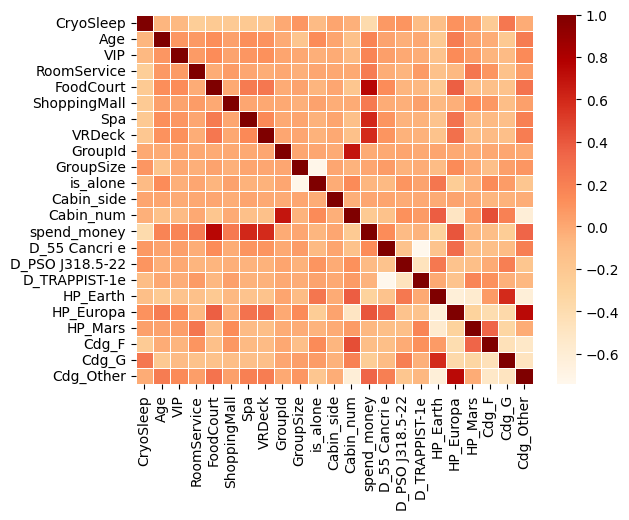

In [35]:
sns.heatmap(
    corr_en_df.corr(),
    fmt = "d", 
    linewidth=0.5,
    cmap="OrRd"
    )

#### 위에 corr()을 보면 파생변수들 제외, 인코딩한 연관값들제외

#### HomePlanet과 Cabin_deck_grouped과 연관성이 제일 깊어 보임

<Axes: xlabel='Cabin_deck_grouped', ylabel='HomePlanet'>

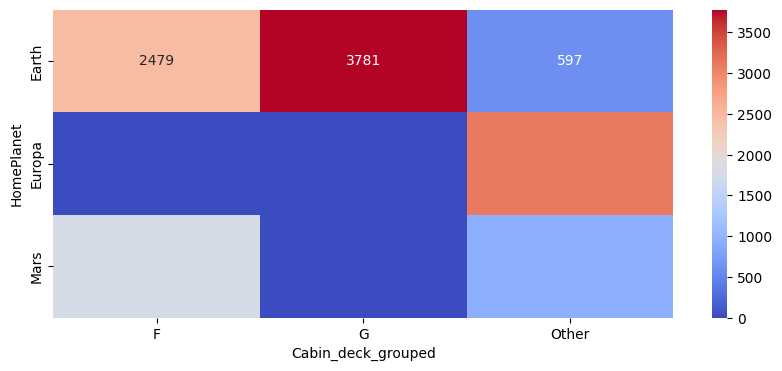

In [36]:
HPCdg_gb = df.groupby(['Cabin_deck_grouped','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
plt.figure(figsize=(10,4))
sns.heatmap(HPCdg_gb.T, annot=True, fmt='g', cmap='coolwarm')

<Axes: xlabel='HomePlanet', ylabel='count'>

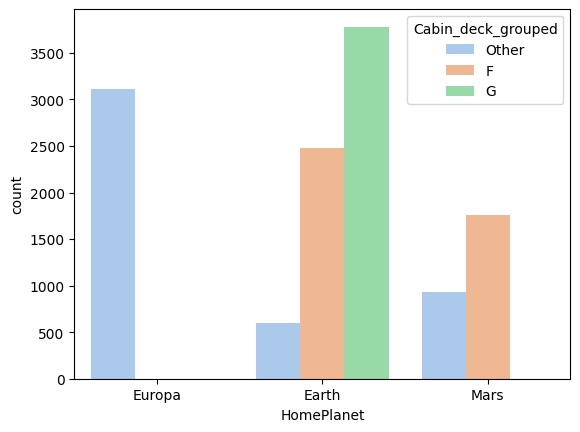

In [37]:
sns.countplot(
    x = "HomePlanet",
    palette = "pastel",
    hue = "Cabin_deck_grouped",
    data =df)

In [38]:
df['HomePlanet'] = df['HomePlanet'].fillna(df.groupby('Cabin_deck_grouped')['HomePlanet'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [39]:
df.isnull().sum()

PassengerId              0
HomePlanet               0
CryoSleep              310
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped     299
Cabin_num              299
LastName                 0
spend_money           1363
dtype: int64

#### groupId와 Cabin_num이 서로 깊은 연관성이 보임

<Axes: xlabel='GroupId', ylabel='Cabin_num'>

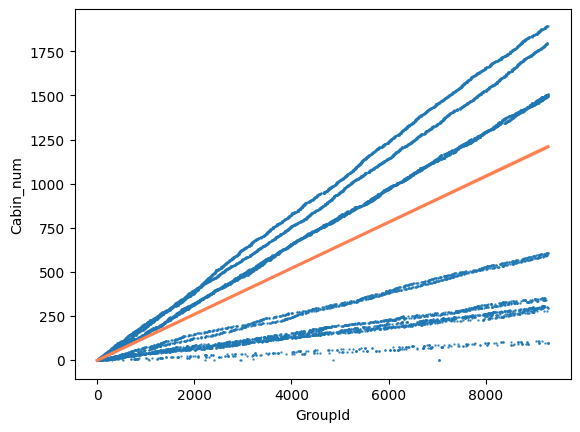

In [40]:
sns.regplot(
    x = "GroupId",
    y = "Cabin_num",
    data = df,
    scatter_kws = {"s":0.5},
    line_kws = {"color":"coral"})

In [41]:
df_not_null = df.dropna(subset=['Cabin_num'])
df_null = df[df['Cabin_num'].isnull()]

In [42]:
from sklearn.linear_model import LinearRegression

X_train = df_not_null[['GroupId']]
y_train = df_not_null['Cabin_num']


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
X_pred = df_null[['GroupId']]
y_pred = model.predict(X_pred)

In [44]:
df.loc[df['Cabin_num'].isnull(), 'Cabin_num'] = y_pred

In [45]:
df.isnull().sum()

PassengerId              0
HomePlanet               0
CryoSleep              310
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped     299
Cabin_num                0
LastName                 0
spend_money           1363
dtype: int64

<Axes: title={'center': 'Cabin_num and Cabin_deck_grouped'}, xlabel='Cabin_deck_grouped', ylabel='Cabin_num'>

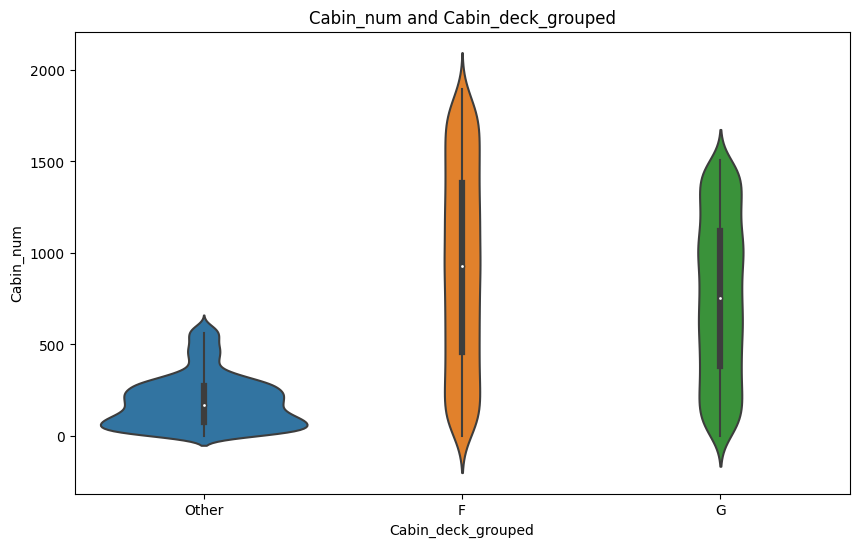

In [46]:
plt.figure(figsize=(10, 6))
plt.title("Cabin_num and Cabin_deck_grouped")
sns.violinplot(
    x = "Cabin_deck_grouped",
    y = "Cabin_num",
    data =df)

In [47]:
df['Cabin_deck_grouped'] = df['Cabin_deck_grouped'].fillna(df.groupby('Cabin_num')['Cabin_deck_grouped'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [48]:
df.isnull().sum()

PassengerId              0
HomePlanet               0
CryoSleep              310
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped     299
Cabin_num                0
LastName                 0
spend_money           1363
dtype: int64

<Axes: title={'center': 'spend_money and CryoSleep'}, xlabel='CryoSleep', ylabel='spend_money'>

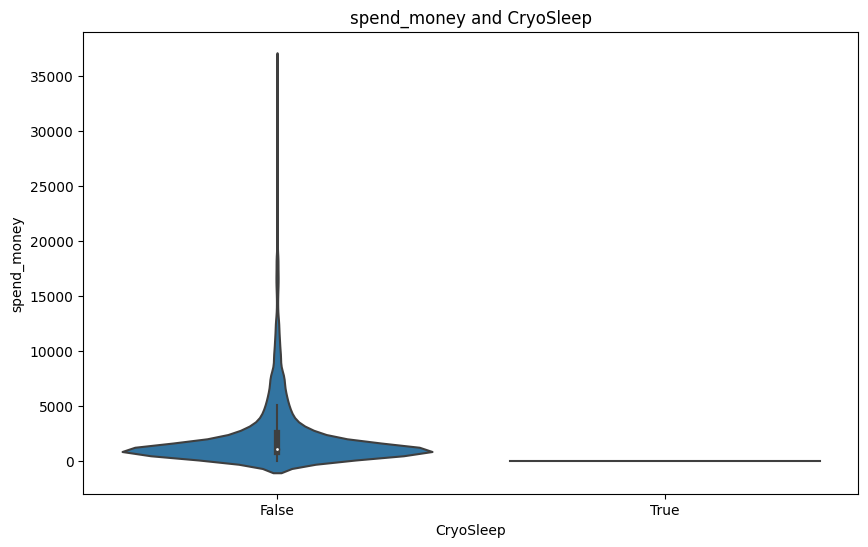

In [49]:
plt.figure(figsize=(10, 6))
plt.title("spend_money and CryoSleep")
sns.violinplot(
    x = "CryoSleep",
    y = "spend_money",
    data =df)

<Axes: title={'center': 'Cabin_num and CryoSleep'}, xlabel='CryoSleep', ylabel='Cabin_num'>

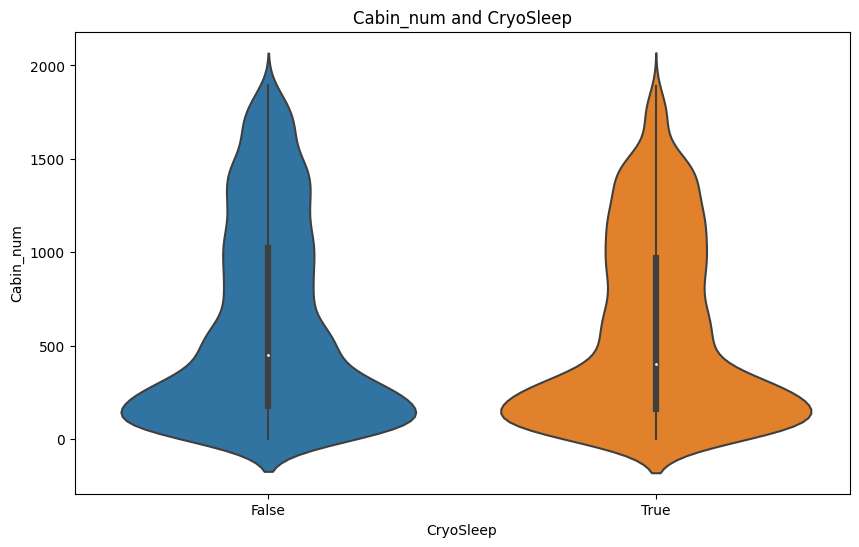

In [50]:
plt.figure(figsize=(10, 6))
plt.title("Cabin_num and CryoSleep")
sns.violinplot(
    x = "CryoSleep",
    y = "Cabin_num",
    data =df)

#### 상관계수가 spend_money와 높은 칼럼 순서대로 그룹화하여 평균값을 채움

In [51]:
df['spend_money'] = df['spend_money'].fillna(df.groupby('CryoSleep')['spend_money'].transform('mean'))

In [52]:
df['spend_money'] = df['spend_money'].fillna(df.groupby('Cabin_num')['spend_money'].transform('mean'))

In [53]:
df['spend_money'] = df['spend_money'].fillna(df.groupby('Age')['spend_money'].transform('mean'))

In [54]:
df.isnull().sum()

PassengerId              0
HomePlanet               0
CryoSleep              310
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped     299
Cabin_num                0
LastName                 0
spend_money              0
dtype: int64

#### Cabin_deck_grouped도 HomePlanet으로 그룹화하여 최빈값으로 결측치를 채움

<Axes: xlabel='Cabin_deck_grouped', ylabel='HomePlanet'>

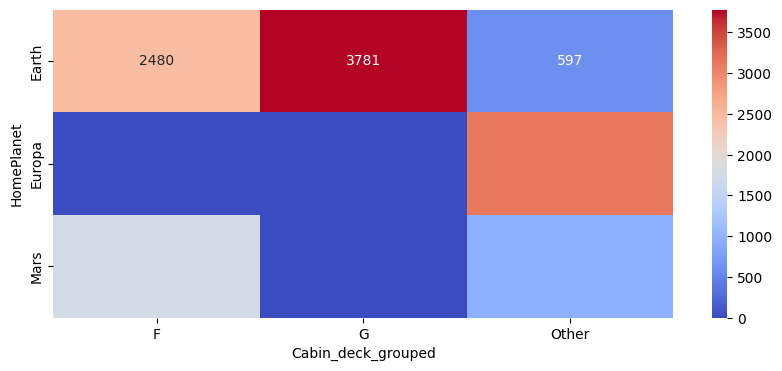

In [55]:
Cabin_gb = df.groupby(['Cabin_deck_grouped','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
plt.figure(figsize=(10,4))
sns.heatmap(Cabin_gb.T, annot=True, fmt='g', cmap='coolwarm')

In [56]:
df['Cabin_deck_grouped'] = df['Cabin_deck_grouped'].fillna(df.groupby('HomePlanet')['Cabin_deck_grouped'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [57]:
df.isnull().sum()

PassengerId              0
HomePlanet               0
CryoSleep              310
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped       0
Cabin_num                0
LastName                 0
spend_money              0
dtype: int64

#### CryoSleep과 spend_money 상관계수:-0.387007861418214

<Axes: title={'center': 'spend_money and CryoSleep'}, xlabel='CryoSleep', ylabel='spend_money'>

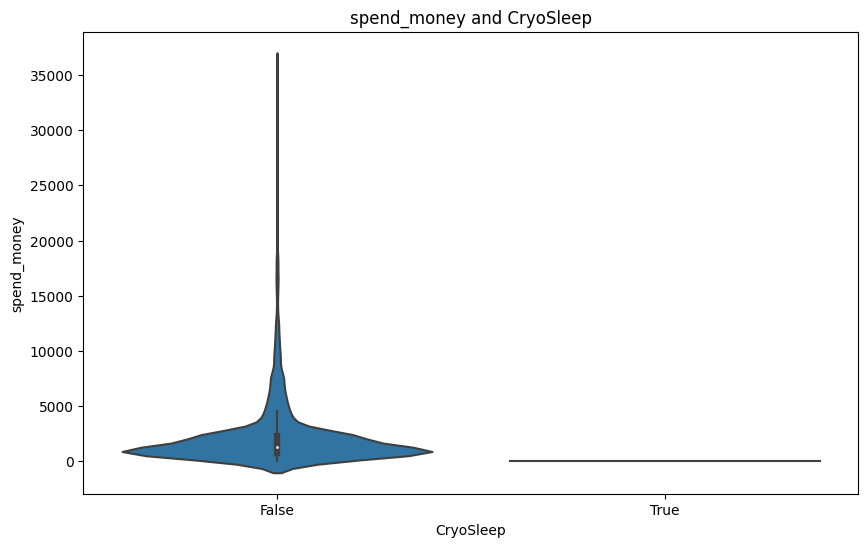

In [58]:
plt.figure(figsize=(10, 6))
plt.title("spend_money and CryoSleep")
sns.violinplot(
    x = "CryoSleep",
    y = "spend_money",
    data =df)

#### CryoSleep와 RoomService 상관계수: -0.259538701357664

<Axes: title={'center': 'RoomService and CryoSleep'}, xlabel='CryoSleep', ylabel='RoomService'>

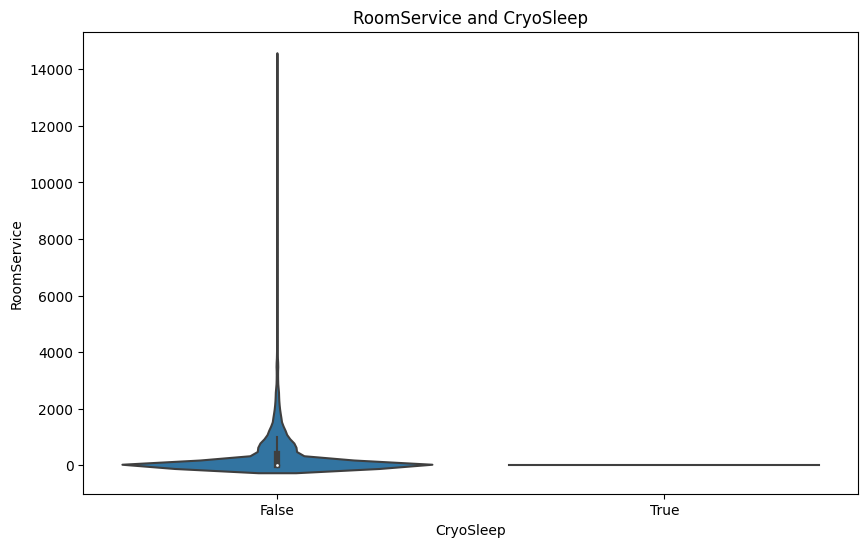

In [59]:
plt.figure(figsize=(10, 6))
plt.title("RoomService and CryoSleep")
sns.violinplot(
    x = "CryoSleep",
    y = "RoomService",
    data =df)

<Axes: xlabel='Cabin_deck_grouped', ylabel='CryoSleep'>

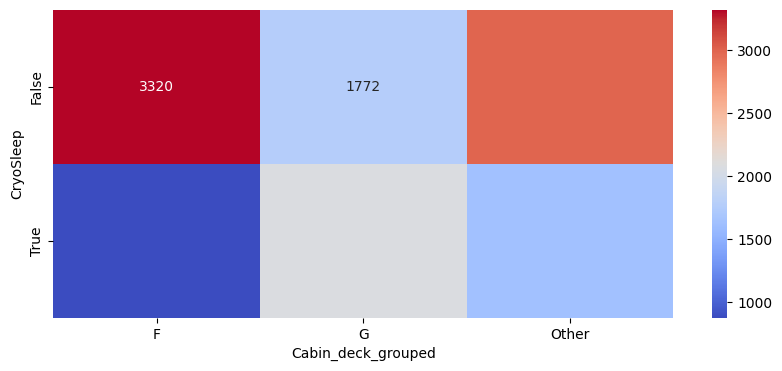

In [60]:
Cabin_gb = df.groupby(['Cabin_deck_grouped','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)
plt.figure(figsize=(10,4))
sns.heatmap(Cabin_gb.T, annot=True, fmt='g', cmap='coolwarm')

In [61]:
df['CryoSleep'] = df['CryoSleep'].fillna(df.groupby('spend_money')['CryoSleep'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [62]:
df['CryoSleep'] = df['CryoSleep'].fillna(df.groupby('RoomService')['CryoSleep'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [63]:
df['CryoSleep'] = df['CryoSleep'].fillna(df.groupby('Cabin_deck_grouped')['CryoSleep'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [64]:
df.isnull().sum()

PassengerId              0
HomePlanet               0
CryoSleep                0
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped       0
Cabin_num                0
LastName                 0
spend_money              0
dtype: int64

<Axes: title={'center': 'FoodCourt and HomePlanet'}, xlabel='HomePlanet', ylabel='FoodCourt'>

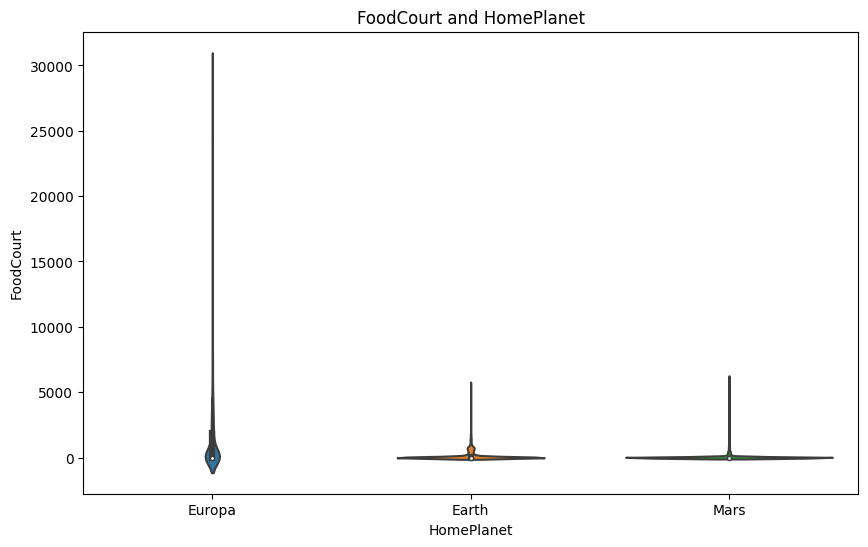

In [65]:
plt.figure(figsize=(10, 6))
plt.title("FoodCourt and HomePlanet")
sns.violinplot(
    x = "HomePlanet",
    y = "FoodCourt",
    data =df)

In [66]:
df['FoodCourt'] = df['FoodCourt'].fillna(df.groupby('HomePlanet')['FoodCourt'].transform('mean'))

In [67]:
df.isnull().sum()

PassengerId              0
HomePlanet               0
CryoSleep                0
Cabin                  299
Destination            274
Age                    270
VIP                    296
RoomService            263
FoodCourt                0
ShoppingMall           306
Spa                    284
VRDeck                 268
Name                   294
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_deck             299
Cabin_side             299
Cabin_deck_grouped       0
Cabin_num                0
LastName                 0
spend_money              0
dtype: int64

<Axes: xlabel='Destination', ylabel='HomePlanet'>

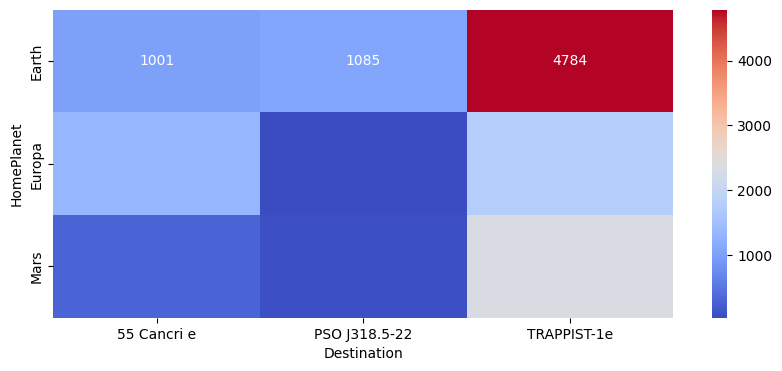

In [68]:
DH_gb = df.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
plt.figure(figsize=(10,4))
sns.heatmap(DH_gb.T, annot=True, fmt='g', cmap='coolwarm')

In [69]:
df['Destination'] = df['Destination'].fillna(df.groupby('HomePlanet')['Destination'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [70]:
df['Destination'].isnull().sum()

0

<Axes: title={'center': 'VRDeck and HomePlanet'}, xlabel='VRDeck', ylabel='HomePlanet'>

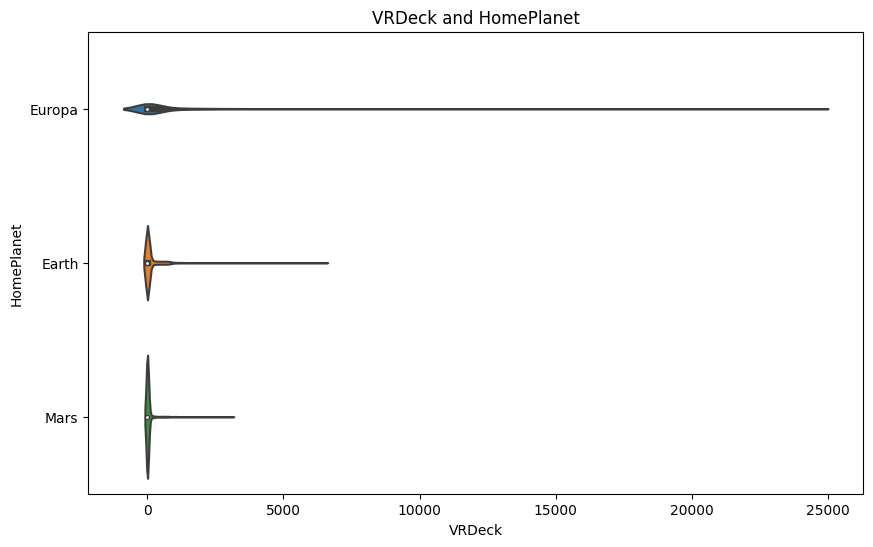

In [71]:
plt.figure(figsize=(10, 6))
plt.title("VRDeck and HomePlanet")
sns.violinplot(
    x = "VRDeck",
    y = "HomePlanet",
    data =df)

In [72]:
df['VRDeck'] = df['VRDeck'].fillna(df.groupby('HomePlanet')['VRDeck'].transform('mean'))

In [73]:
df['VRDeck'].isnull().sum()

0

<Axes: title={'center': 'Spa and HomePlanet'}, xlabel='Spa', ylabel='HomePlanet'>

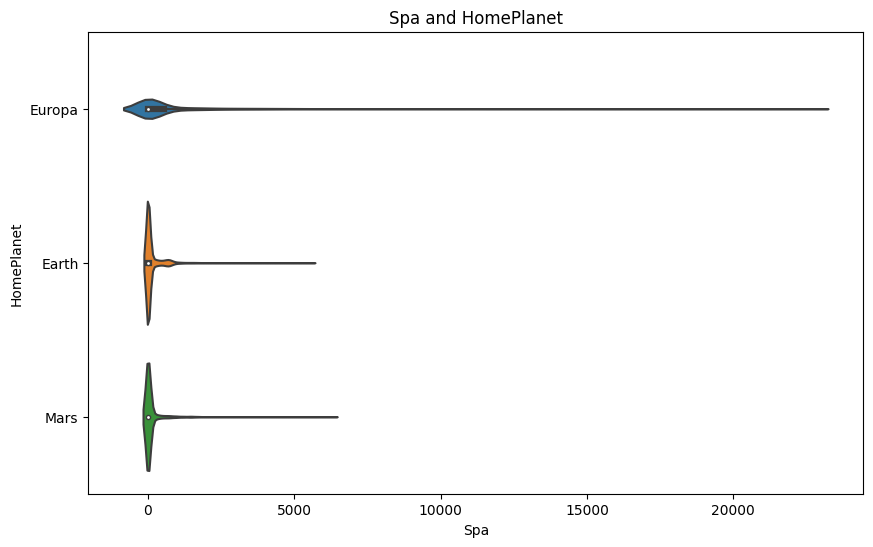

In [74]:
plt.figure(figsize=(10, 6))
plt.title("Spa and HomePlanet")
sns.violinplot(
    x = "Spa",
    y = "HomePlanet",
    data =df)

In [75]:
df['Spa'] = df['Spa'].fillna(df.groupby('HomePlanet')['Spa'].transform('mean'))

In [76]:
df['Spa'].isnull().sum()

0

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         12970 non-null  object 
 1   HomePlanet          12970 non-null  object 
 2   CryoSleep           12970 non-null  object 
 3   Cabin               12671 non-null  object 
 4   Destination         12970 non-null  object 
 5   Age                 12700 non-null  float64
 6   VIP                 12674 non-null  object 
 7   RoomService         12707 non-null  float64
 8   FoodCourt           12970 non-null  float64
 9   ShoppingMall        12664 non-null  float64
 10  Spa                 12970 non-null  float64
 11  VRDeck              12970 non-null  float64
 12  Name                12676 non-null  object 
 13  Transported         8693 non-null   object 
 14  GroupId             12970 non-null  int64  
 15  GroupSize           12970 non-null  int64  
 16  is_a

In [ ]:
df['RoomService'] = df['RoomService'].fillna(df.groupby('CryoSleep')['RoomService'].transform('mean'))

In [ ]:
df['RoomService'].isnull().sum()

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Age and HomePlanet")
sns.violinplot(
    x = "Age",
    y = "HomePlanet",
    data =df)

In [ ]:
df['Age'] = df['Age'].fillna(df.groupby('HomePlanet')['Age'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df['Age'].isnull().sum()

In [ ]:
df['ShoppingMall'] = df['ShoppingMall'].fillna(df.groupby('CryoSleep')['ShoppingMall'].transform('mean'))

In [ ]:
df['ShoppingMall'].isnull().sum()

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("spend_money and VIP")
sns.violinplot(
    x = "spend_money",
    y = "VIP",
    data =df)

In [79]:
df['VIP'] = df['VIP'].fillna(df.groupby('spend_money')['VIP'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [80]:
df['VIP'].isnull().sum()

43

In [81]:
df['VIP'] = df['VIP'].fillna(df.groupby('HomePlanet')['VIP'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [82]:
df['VIP'].isnull().sum()

0

In [83]:
df['Cabin_side'] = df['Cabin_side'].fillna(df.groupby('CryoSleep')['Cabin_side'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [84]:
df['Cabin_side'].isnull().sum()

0

#### Name, Cabin는 drop하기로함

In [85]:
df = df.drop(["Name","Cabin","Cabin_deck"], axis =1)

In [86]:
df.isnull().sum()

PassengerId              0
HomePlanet               0
CryoSleep                0
Destination              0
Age                    270
VIP                      0
RoomService            263
FoodCourt                0
ShoppingMall           306
Spa                      0
VRDeck                   0
Transported           4277
GroupId                  0
GroupSize                0
is_alone                 0
Cabin_side               0
Cabin_deck_grouped       0
Cabin_num                0
LastName                 0
spend_money              0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         12970 non-null  object 
 1   HomePlanet          12970 non-null  object 
 2   CryoSleep           12970 non-null  object 
 3   Destination         12970 non-null  object 
 4   Age                 12700 non-null  float64
 5   VIP                 12970 non-null  object 
 6   RoomService         12707 non-null  float64
 7   FoodCourt           12970 non-null  float64
 8   ShoppingMall        12664 non-null  float64
 9   Spa                 12970 non-null  float64
 10  VRDeck              12970 non-null  float64
 11  Transported         8693 non-null   object 
 12  GroupId             12970 non-null  int64  
 13  GroupSize           12970 non-null  int64  
 14  is_alone            12970 non-null  bool   
 15  Cabin_side          12970 non-null  object 
 16  Cabi

In [88]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,GroupSize,Cabin_num,spend_money
count,12700.000000,12707.000000,12970.000000,12664.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.771969,222.897852,451.299429,174.906033,308.529463,306.188301,4635.337471,2.022976,603.167122,1464.833467
std,14.387261,647.596664,1568.883299,590.558690,1118.781778,1168.742566,2685.904299,1.577102,509.922913,2710.650431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.146043,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2306.250000,1.000000,172.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4632.000000,1.000000,437.000000,756.000000
75%,38.000000,49.000000,106.750000,29.000000,87.000000,57.750000,6924.750000,2.000000,1003.000000,1818.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,1894.000000,35987.000000


In [89]:
cat_cols = [col for col in df.columns if df[col].dtype in ['object','bool']]
df[cat_cols].describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,is_alone,Cabin_side,Cabin_deck_grouped,LastName
count,12970,12970,12970,12970,12970,8693,12970,12970,12970,12970
unique,12970,3,2,3,2,2,2,2,3,2407
top,0001_01,Earth,False,TRAPPIST-1e,False,True,True,S,Other,
freq,1,7019,8230,9145,12696,4378,7145,6503,4731,294



# LabelEncoding: CryoSleep, is_alone, Cabin_side, vip

In [90]:
import sklearn
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [91]:
label_encoder.fit(df["CryoSleep"])

LabelEncoder()

In [92]:
df["CryoSleep"]

0        False
1        False
2        False
3        False
4        False
         ...  
12965     True
12966    False
12967     True
12968    False
12969     True
Name: CryoSleep, Length: 12970, dtype: object

In [93]:
label_encoder.transform(df["CryoSleep"])

array([0, 0, 0, ..., 1, 0, 1])

In [94]:
df["CryoSleep"] = label_encoder.transform(df["CryoSleep"])

In [95]:
label_encoder.fit(df["is_alone"])

LabelEncoder()

In [96]:
df["is_alone"]

0         True
1         True
2        False
3        False
4         True
         ...  
12965    False
12966     True
12967     True
12968     True
12969     True
Name: is_alone, Length: 12970, dtype: bool

In [97]:
label_encoder.transform(df["is_alone"])

array([1, 1, 0, ..., 1, 1, 1])

In [98]:
df["is_alone"] = label_encoder.transform(df["is_alone"])

In [99]:
label_encoder.fit(df["Cabin_side"])

LabelEncoder()

In [100]:
df["Cabin_side"]

0        P
1        S
2        S
3        S
4        S
        ..
12965    S
12966    P
12967    P
12968    P
12969    S
Name: Cabin_side, Length: 12970, dtype: object

In [101]:
label_encoder.transform(df["Cabin_side"])

array([0, 1, 1, ..., 0, 0, 1])

In [102]:
df["Cabin_side"] = label_encoder.transform(df["Cabin_side"])

In [103]:
label_encoder.fit(df["VIP"])

LabelEncoder()

In [104]:
df["VIP"]

0        False
1        False
2         True
3        False
4        False
         ...  
12965    False
12966    False
12967    False
12968    False
12969    False
Name: VIP, Length: 12970, dtype: object

In [105]:
label_encoder.transform(df["VIP"])

array([0, 0, 1, ..., 0, 0, 0])

In [106]:
df["VIP"] = label_encoder.transform(df["VIP"])

# HomePlanet, Destination, Cabin_deck_grouped은 One Hot Encoding

In [107]:
HomePlanet_dummies = pd.get_dummies(df["HomePlanet"],prefix="HP",dtype=int)

In [108]:
df = pd.concat([df,HomePlanet_dummies],axis =1)

In [109]:
df = df.drop(["HomePlanet"],axis =1)

In [110]:
Destination_dummies = pd.get_dummies(df["Destination"],prefix="D",dtype=int)

In [111]:
df = pd.concat([df,Destination_dummies],axis =1)

In [112]:
df = df.drop(["Destination"],axis =1)

In [113]:
Cabin_deck_dummies = pd.get_dummies(df["Cabin_deck_grouped"],prefix="Cabin_deck",dtype=int)

In [114]:
df = pd.concat([df,Cabin_deck_dummies],axis =1)

In [115]:
df = df.drop(["Cabin_deck_grouped"],axis =1)

# 스케일링 :Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, GroupId, Cabin_num, spend_money(Standard)/ GroupSize(minmax)

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [117]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [118]:
df[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","GroupId","Cabin_num","spend_money"]] = standard_scaler.fit_transform(df[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","GroupId","Cabin_num","spend_money"]])

In [119]:
df[["GroupSize"]] = minmax_scaler.fit_transform(df[["GroupSize"]])

In [120]:
df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,spend_money,HP_Earth,HP_Europa,HP_Mars,D_55 Cancri e,D_PSO J318.5-22,D_TRAPPIST-1e,Cabin_deck_F,Cabin_deck_G,Cabin_deck_Other
0,0001_01,0,0.710937,0,-0.344206,-0.287668,-0.296182,-0.275783,-0.261991,False,...,-0.540420,0,1,0,0,0,1,0,0,1
1,0002_01,0,-0.331693,0,-0.175885,-0.281931,-0.253848,0.214948,-0.224342,True,...,-0.268888,1,0,0,0,0,1,1,0,0
2,0003_01,0,2.031602,1,-0.277804,1.991749,-0.296182,5.726512,-0.220064,False,...,3.290174,0,1,0,0,0,1,0,0,1
3,0003_02,0,0.293885,0,-0.344206,0.530143,0.332061,2.699889,-0.096850,False,...,1.369158,0,1,0,0,0,1,0,0,1
4,0004_01,0,-0.887763,0,0.123696,-0.243048,-0.040482,0.229250,-0.260280,True,...,-0.137918,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,1,0.363394,0,-0.344206,-0.287668,-0.296182,-0.275783,-0.261991,NaN,...,-0.540420,1,0,0,0,0,1,0,1,0
12966,9269_01,0,0.919463,0,-0.344206,0.252228,-0.267395,-0.266845,-0.138777,NaN,...,-0.164850,1,0,0,0,0,1,0,1,0
12967,9271_01,1,NaN,0,-0.344206,-0.287668,-0.296182,-0.275783,-0.261991,NaN,...,-0.540420,0,0,1,1,0,0,0,0,1
12968,9273_01,0,NaN,0,-0.344206,1.420620,-0.296182,-0.275783,0.185516,NaN,...,0.641261,0,1,0,0,0,1,0,0,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       12970 non-null  object 
 1   CryoSleep         12970 non-null  int64  
 2   Age               12700 non-null  float64
 3   VIP               12970 non-null  int64  
 4   RoomService       12707 non-null  float64
 5   FoodCourt         12970 non-null  float64
 6   ShoppingMall      12664 non-null  float64
 7   Spa               12970 non-null  float64
 8   VRDeck            12970 non-null  float64
 9   Transported       8693 non-null   object 
 10  GroupId           12970 non-null  float64
 11  GroupSize         12970 non-null  float64
 12  is_alone          12970 non-null  int64  
 13  Cabin_side        12970 non-null  int64  
 14  Cabin_num         12970 non-null  float64
 15  LastName          12970 non-null  object 
 16  spend_money       12970 non-null  float6

In [123]:
df = df.drop(["LastName"],axis = 1)

In [124]:
train_df = df.iloc[:8693]
test_df = df.iloc[8693:]

In [125]:
train_df.to_csv("./data/preprocessed_train.csv",index = False)
test_df = test_df.drop(["Transported"],axis=1)
test_df.to_csv("./data/preprocessed_test.csv",index=False)